## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [13]:
import gdown

file_id = '1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'
output_file = 'dataset.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 163MB/s]


'dataset.zip'

In [14]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
replace dataset/no/no0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/no/no1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [2]:
(training_dataset, original_validation_dataset) = tf.keras.utils.image_dataset_from_directory(
    '/content/dataset',
    labels='inferred',
    label_mode='int',
    class_names=['no', 'yes'],
    color_mode='grayscale',
    batch_size=64,
    image_size=(256,256),
    validation_split=0.2,
    subset='both',
    seed=20
)

# split some of the validation data for testing
validation_size = int(0.2 * len(original_validation_dataset))
test_dataset = original_validation_dataset.take(validation_size)
validation_dataset = original_validation_dataset.skip(validation_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

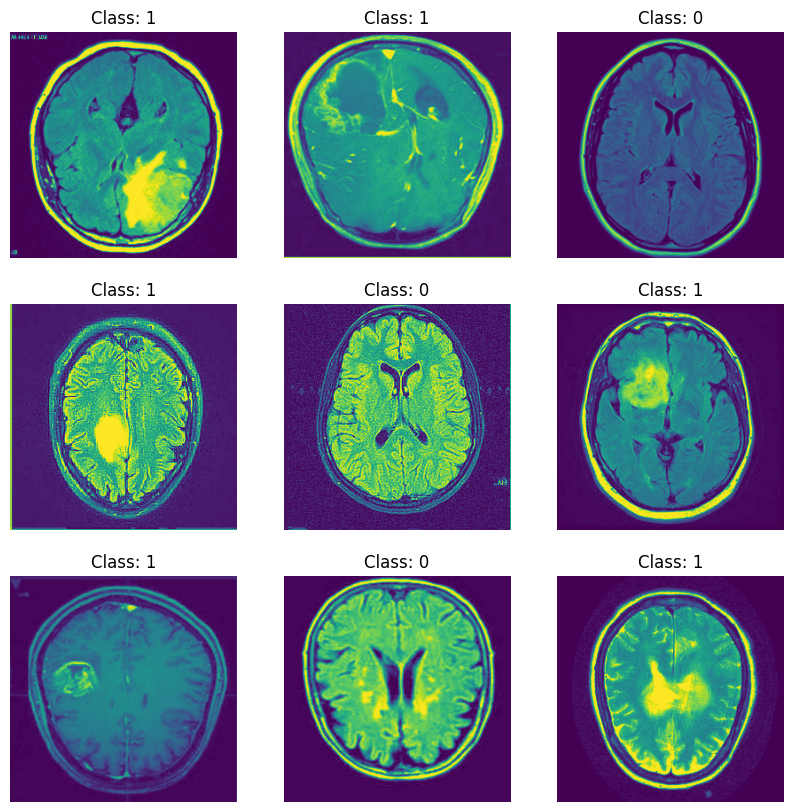

In [3]:
# displaying first 9 images of one of the batches
for images, labels in training_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis("off")

    plt.show()

## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [11]:
model_sequential = Sequential([
    Input(shape=(256, 256, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_sequential.summary()

# Compile the model
model_sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 128)      

### **Train the model**

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_sequential.fit(training_dataset, validation_data=validation_dataset, epochs=10, callbacks=[early_stopping])

Epoch 1/10
38/38 [==============================] - 7s 125ms/step - loss: 60.3464 - accuracy: 0.7617 - val_loss: 0.3244 - val_accuracy: 0.8792
Epoch 2/10
38/38 [==============================] - 6s 142ms/step - loss: 0.1938 - accuracy: 0.9321 - val_loss: 0.1644 - val_accuracy: 0.9640
Epoch 3/10
38/38 [==============================] - 5s 122ms/step - loss: 0.0747 - accuracy: 0.9800 - val_loss: 0.1423 - val_accuracy: 0.9576
Epoch 4/10
38/38 [==============================] - 6s 141ms/step - loss: 0.0348 - accuracy: 0.9917 - val_loss: 0.1312 - val_accuracy: 0.9703
Epoch 5/10
38/38 [==============================] - 5s 121ms/step - loss: 0.0213 - accuracy: 0.9958 - val_loss: 0.1328 - val_accuracy: 0.9682
Epoch 6/10
38/38 [==============================] - 6s 141ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.1407 - val_accuracy: 0.9682
Epoch 7/10
38/38 [==============================] - 5s 128ms/step - loss: 0.0100 - accuracy: 0.9983 - val_loss: 0.1433 - val_accuracy: 0.9703


### **Test the model**

In [13]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model_sequential.evaluate(training_dataset)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_sequential.evaluate(test_dataset)

print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

2/2 [==============================] - 0s 63ms/step - loss: 0.0466 - accuracy: 0.9844
Training Accuracy: 0.9975, Training Loss: 0.0151
Test Accuracy: 0.9844, Test Loss: 0.0466


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

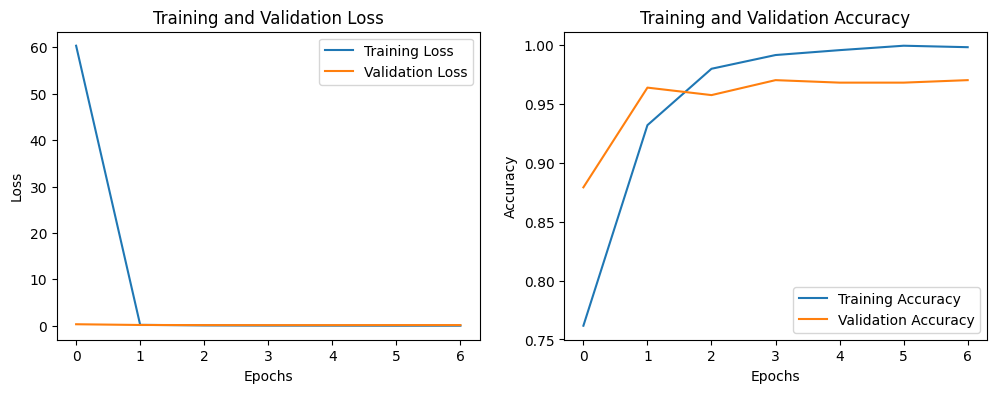

In [16]:
# plot training and test loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## **2.Functional API**

### **Build a model**

In [19]:
inputs = Input(shape=(256, 256, 1))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_functional = tf.keras.Model(inputs=inputs, outputs=outputs)

model_functional.summary()

# compile the model
model_functional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       7385

### **Train the model**

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_functional.fit(training_dataset, validation_data=validation_dataset, epochs=10, callbacks=[early_stopping])

Epoch 1/10
38/38 [==============================] - 9s 173ms/step - loss: 38.9544 - accuracy: 0.7150 - val_loss: 0.4710 - val_accuracy: 0.7691
Epoch 2/10
38/38 [==============================] - 5s 131ms/step - loss: 0.3335 - accuracy: 0.8604 - val_loss: 0.2177 - val_accuracy: 0.9237
Epoch 3/10
38/38 [==============================] - 6s 141ms/step - loss: 0.1278 - accuracy: 0.9613 - val_loss: 0.1556 - val_accuracy: 0.9597
Epoch 4/10
38/38 [==============================] - 5s 126ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.1295 - val_accuracy: 0.9682
Epoch 5/10
38/38 [==============================] - 6s 142ms/step - loss: 0.0370 - accuracy: 0.9867 - val_loss: 0.1319 - val_accuracy: 0.9746
Epoch 6/10
38/38 [==============================] - 5s 123ms/step - loss: 0.0460 - accuracy: 0.9837 - val_loss: 0.1648 - val_accuracy: 0.9534
Epoch 7/10
38/38 [==============================] - 5s 127ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.1264 - val_accuracy: 0.9767
Epoch

### **Test the model**

In [21]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model_functional.evaluate(training_dataset)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_functional.evaluate(test_dataset)

print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

2/2 [==============================] - 0s 100ms/step - loss: 0.1035 - accuracy: 0.9688
Training Accuracy: 0.9996, Training Loss: 0.0062
Test Accuracy: 0.9688, Test Loss: 0.1035


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

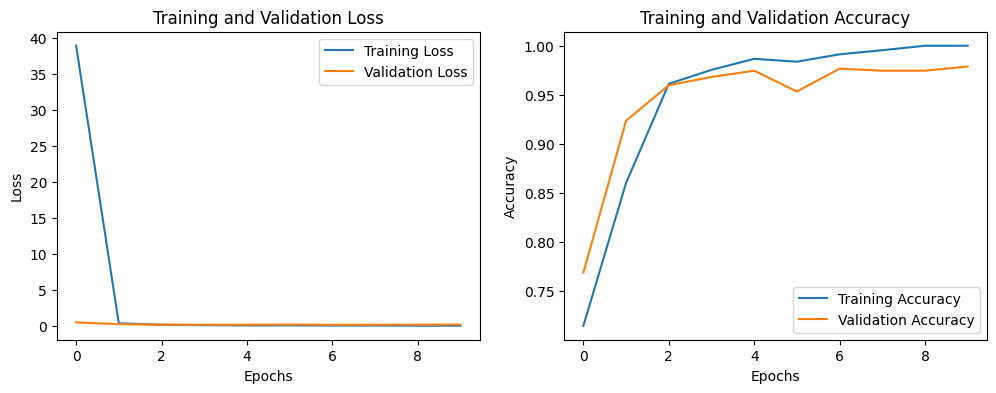

In [22]:
# plot training and test loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()